# Final Project - Seth Bernstein
### Adult (Census Income) Dataset
Source: https://www.kaggle.com/wenruliu/adult-income-dataset

First I need to import the libraries I will be using for data exploration/cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now I'll read the data into a data frame and look at its head

In [2]:
adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Looking at the data, some of it is already cleaned while some of it is not yet. I can see that there are "?" for missing values.  

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


After looking at the info, I can see that there are 48,842 rows with 15 columns.

In order to start exploring, I am first going to replace all "?" with null values.

In [5]:
adult.replace('?', np.nan, inplace=True)

Using seaborn, I'm going to creata a heatmap of all of the null values

<AxesSubplot:>

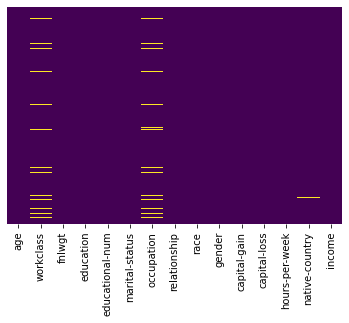

In [6]:
sns.heatmap(adult.isnull(),yticklabels=False,cbar=False,cmap='viridis')

After looking at the heatmap, these null values are difficult to impute and there arent many of them so I am going to drop them.

In [7]:
adult.dropna(inplace=True)
adult.shape

(45222, 15)

After dopping the null values, there are now 45,222 values, so I deleted 3,620 values

## Data Exploration

Distribution of ages

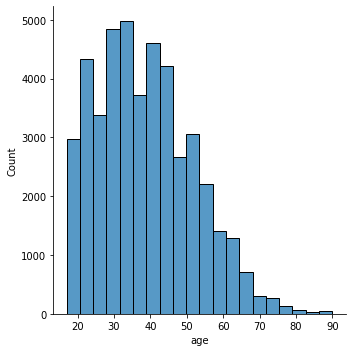

In [8]:
sns.displot(adult['age'], bins=20)

In [9]:
adult['age'].mean()

38.547941267524656

After looking at the graph, the ages are distributed evenly with the mean age being 36.6

Now I'm going to look at the number of unique values per column

In [10]:
adult.nunique()

age                   74
workclass              7
fnlwgt             26741
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

# Question 1: Can logistic regression predict income?

First I am going to make a new dataset with dummy variables  in order to make every value a number.

In [11]:
log_adult = adult.copy()

In [12]:
new_income = {'<=50K': 0, '>50K':1}
log_adult.replace({'income': new_income}, inplace=True)
log_adult.rename(columns={'income': 'income_over'},inplace=True)
log_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_over
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


It looks like the education column has already been converted into numerics so we can drop it

In [13]:
log_adult.drop('education',axis=1,inplace=True)

In [14]:
log_adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_over
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


The fnlwgt column does not seem relevent to logistic regression so I am going to drop it

In [15]:
log_adult.drop('fnlwgt',axis=1,inplace=True)

I'm going to convert the weeks worked into groups

In [16]:
def week_convert(num):
    if num<20:
        return 1
    elif num>=21 and num<40:
        return 2
    else:
        return 3

In [17]:
log_adult['hours_group'] = log_adult['hours-per-week'].apply(week_convert)
log_adult.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_over,hours_group
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,3
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,3
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,3
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,3
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,2


Now I am going to turn the rest of the columns into 1s and 0s by creating dummy variables

In [18]:
workclass_num = pd.get_dummies(log_adult['workclass'],drop_first=True)
marital_num = pd.get_dummies(log_adult['marital-status'],drop_first=True)
occupation_num = pd.get_dummies(log_adult['occupation'],drop_first=True)
relationship_num = pd.get_dummies(log_adult['relationship'],drop_first=True)
race_num = pd.get_dummies(log_adult['race'],drop_first=True)
gender_male = pd.get_dummies(log_adult['gender'], drop_first=True)
country_num = pd.get_dummies(log_adult['native-country'],drop_first=True)

In [19]:
log_adult.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income_over', 'hours_group'],
      dtype='object')

In [20]:
log_adult.drop(['workclass','marital-status', 'occupation',
       'relationship', 'race', 'gender','hours-per-week', 'native-country'],axis=1,inplace=True)
train = pd.concat([workclass_num,marital_num,occupation_num,relationship_num,race_num,gender_male,country_num],axis=1)
train.head()

,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Now that that data has been prepared, I can apply regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

I am going to preform a grid search to find the best hyperparameters for the model

In [22]:
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear'],

             } 

log_model = GridSearchCV(LogisticRegression(random_state=4142020),param_grid,refit=True)

Now I am going to split the data run it through the model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = log_adult.drop('income_over',axis=1)
y = log_adult['income_over']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4142020)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
log_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=4142020),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [28]:
predictions = log_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[10661   610]
 [ 2236  1417]]
0.8093004556419191
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     11271
           1       0.70      0.39      0.50      3653

    accuracy                           0.81     14924
   macro avg       0.76      0.67      0.69     14924
weighted avg       0.80      0.81      0.79     14924



Lets look at a regression plot for the predictions

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.0)

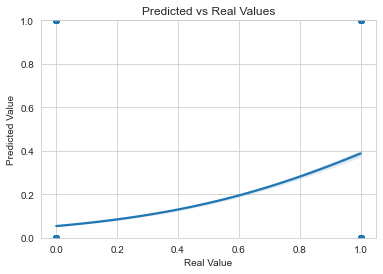

In [29]:
sns.set_style('whitegrid')
sns.regplot(y_test,predictions,logistic=True)
plt.title('Predicted vs Real Values')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.ylim(0,1)

\*In order to get the graph to plot, I needed to replace line 84 of seaborn's algorithims.py with:
resampler = integers(0, n, n, dtype=np.int_)

Now I am going to run cross validation to test the accuracy of the train, test, split

In [30]:
from sklearn.model_selection import KFold

In [31]:
kf = KFold(n_splits=5, shuffle=True,random_state=120121)
kf_num = kf.get_n_splits(X)
scores = []
for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_model.fit(X_train,y_train)
    preds = log_model.predict(X_test)
    scores.append(accuracy_score(y_test,preds))
mean = lambda x: sum(x)/len(x)
print(f'Average accuracy after {kf_num} folds is {mean(scores)}')

Average accuracy after 5 folds is 0.8089203938536226


There is about a 0.1% difference between the avergae cross valedation score and the orignal predictions. So the model I built is accurate

## Question 2: What is the most Common Job for people over and under $50,000?

First I am going to make a filter that makes a data frame from people over and under $50,000

In [32]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [33]:
#under
less = adult[adult['income']=='<=50K']['occupation']
less_frame = pd.DataFrame(less.value_counts())
less_frame = less_frame.rename(columns={'occupation':'amount'})

#over
over = adult[adult['income']=='>50K']['occupation']
over_frame = pd.DataFrame(over.value_counts())
over_frame = over_frame.rename(columns={'occupation':'amount'})

In [34]:
less_frame

,amount
Adm-clerical,4784
Craft-repair,4665
Other-service,4612
Sales,3953
Prof-specialty,3304
Exec-managerial,3117
Machine-op-inspct,2605
Handlers-cleaners,1911
Transport-moving,1838
Farming-fishing,1308


In [35]:
over_frame

,amount
Exec-managerial,2867
Prof-specialty,2704
Sales,1455
Craft-repair,1355
Adm-clerical,756
Transport-moving,478
Tech-support,411
Machine-op-inspct,365
Protective-serv,307
Other-service,196


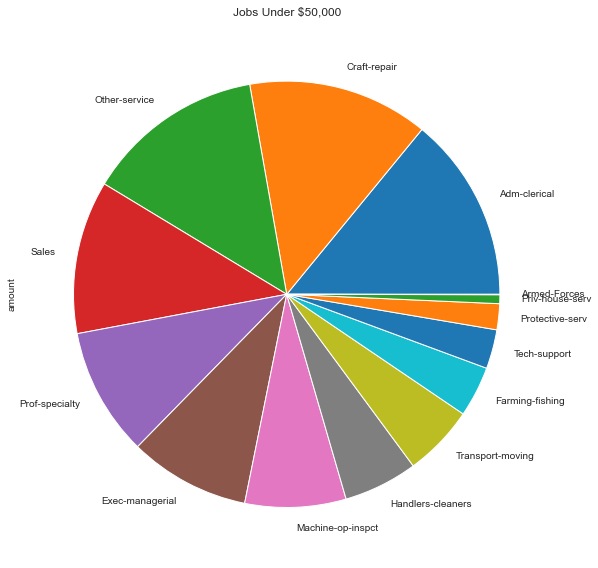

In [36]:
less_frame.plot(kind='pie',subplots=True,legend=False,figsize=(10,8),title='Jobs Under $50,000')
plt.tight_layout()

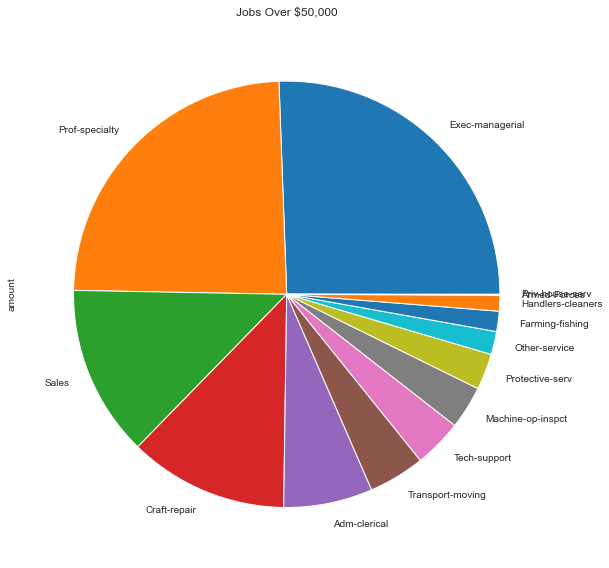

In [37]:
over_frame.plot(kind='pie',subplots=True,figsize=(10,8),legend=False,title='Jobs Over $50,000')
plt.tight_layout()